In [ ]:
from itertools import product

total_nucleotides = len(DNA_sequence)
k = 3
kmers = product(["A","T","G","C"],repeat = k)
kmers = [''.join(k) for k in kmers]

results = {}
for kmer in kmers:
    results[kmer] = DNA_sequence.count(kmer)

print(f"The k-mer profile of our sequence is: {str(results)}")

In [118]:
from itertools import product

aas = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']
k = 3
kmers = product(aas,repeat = k)
kmers = [''.join(k) for k in kmers]

In [3]:
len(kmers)

8000

In [4]:
from pandas import DataFrame

In [5]:
import matplotlib.pyplot as plt

In [7]:
vals = [[10, 15],[7,5]]

In [29]:
df = DataFrame(vals, index=['AAA', 'AAC'], columns=['seq1', 'seq2'])
df

df2 = DataFrame([[2, 3], [8, 9]], index=['AAC', 'AAA'], columns=['1', '2'])
df

,seq1,seq2
AAA,10,15
AAC,7,5


<function matplotlib.pyplot.show(*args, **kw)>

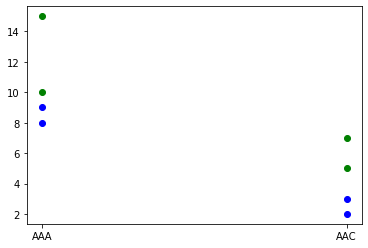

In [30]:
plt.plot(df, 'go')
plt.plot(df2, 'bo')
plt.show

In [34]:
def kmer_profile(seq, kmers):
    results = {}
    for kmer in kmers:
        if seq.count(kmer) != 0:
            results[kmer] = seq.count(kmer)
    return results

In [45]:
def kmer_counts(seqs, k=3):
    results = {}
    for seq_id, seq in seqs.items():
        for i in range(len(seq) - (k - 1)):
            short = seq[i: i+k]
            results[short] = results.get(short, 0) + 1
    return results
            

In [38]:
def parse_fasta_file(input_file, prot_family=''):
    """Return a dict of {id:gene_seq} pairs based on the sequences in the input FASTA file
    input_file -- a file handle for an input fasta file
    prot_family -- string representing the protein family that we want to focus on.
        When this parameter is given, only sequences of this family are added to the dictionary
        When it is not given, the whole file is added to the dictionary
    """
    parsed_seqs = {}
    curr_seq_id = None
    curr_seq = []
    
    prev_prot_in_family = False
    
    # parse every line in the file
    for line in input_file:
        
        # get rid of \n and \t characters
        line = line.strip()
        
        # identifier line
        if line.startswith(">"):
                
            if (curr_seq_id is not None) and prev_prot_in_family:
                # add the sequence to the dictionary
                parsed_seqs[curr_seq_id] = ''.join(curr_seq)
            
            # check if the id contains the protein family we want
            if prot_family in line:
                prev_prot_in_family = True
            else:
                prev_prot_in_family = False
                
            curr_seq_id = line[1:]
            curr_seq = []
            continue

        curr_seq.append(line)

    #Add the final sequence to the dict
    parsed_seqs[curr_seq_id] = ''.join(curr_seq)
    return parsed_seqs

In [104]:
file = open('COMPARE2025-FastA-Seq-01-27-2025.txt', 'r')
allergen_dict = parse_fasta_file(file, 'lipocalin')
file.close()

In [90]:
def find_repeated_seqs(seq_dict, num_appearances=1, k=3):
    unfiltered = kmer_counts(allergen_dict, k)
    filtered = {}
    for seq, count in unfiltered.items():
        if count > num_appearances:
            filtered[seq] = count
    return filtered

In [111]:
rep_seq_dict = find_repeated_seqs(allergen_dict, 5, 8)

In [115]:
from pandas import Series
s = DataFrame(rep_seq_dict, index=['count'])
s

,LLLLCLGL,LLLCLGLT,LLCLGLTL,LCLGLTLV,CLGLTLVC,EKIEENGS,KIEENGSM,IEENGSMR,EENGSMRV,ENGSMRVF
count,9,6,6,6,6,7,7,7,7,7


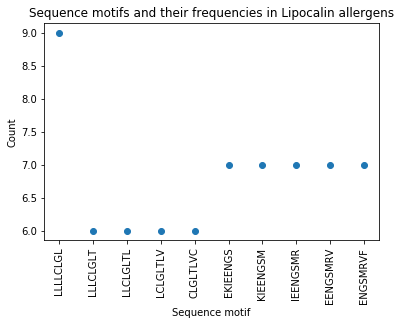

In [117]:

x, y = zip((*rep_seq_dict.items()))
plt.plot(x, y, 'o')
plt.xticks(rotation=90)
plt.title('Sequence motifs and their frequencies in Lipocalin allergens')
plt.ylabel('Count')
plt.xlabel('Sequence motif')

plt.show()

In [101]:
file = open('human_lipocalin_protein_sequences.fasta', 'r')
human_dict = parse_fasta_file(file)
file.close()

In [103]:
sim = {}
for seq, count in rep_seq_dict.items():
    human_count = 0
    for seq_id, human_seq in human_dict.items():
        human_count += human_seq.count(seq)
    if human_count > 0:
        sim[seq] = human_count
if len(sim) == 0:
    print("No similar sequences found within humans")
else:
    print(f"Similar sequences found with their count: {sim}")

Similar sequences found with their count: {'LLASD': 2, 'NIIDL': 1, 'IIDLT': 1, 'TDYDN': 1}
